# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data has 17 marketing campaigns, based on the materials posted in the https://archive.ics.uci.edu/dataset/222/bank+marketing. There is documentation named CRISP-DM-BANK.pdf that can be found in the link and referenced to support the number of campaigns on page 2 that happened between May 2008 and November 2010 with a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit
application, with good interest rates, was offered. For each
contact, a large number of attributes was stored and if there was a success.
For the whole database considered, there were 6499
successes with an 8% success rate.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
# Checking for any missing values and data types
print("Dataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4

There are no missing values in this dataset. There are numerical features like age, campaign, cons.price.idx and as int64, float64. The categorical features that are object like job, contact, loan wiil need to be encoded.

Note - for feature (duration) might be removed from this evaluation for realistic predictions.

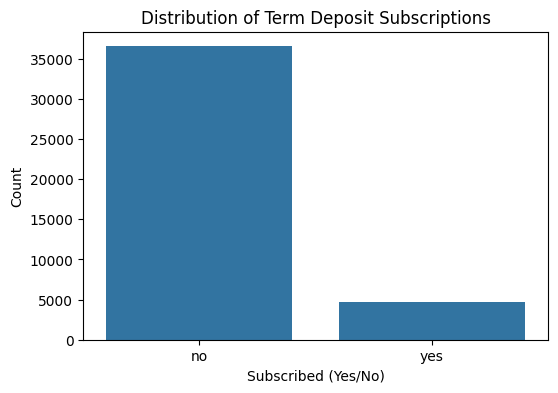

In [5]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Term Deposit Subscriptions')
plt.xlabel('Subscribed (Yes/No)')
plt.ylabel('Count')
plt.show()

Plot shows a huge imbalance in the data, probably due to the duration feature but is most like not going to be used because the longer the call the better the chances of accepting the term subscription and this is to solve for "what's likely" the outcome.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Predict weather a customer is going to subscribe or not to a term deposit and better the chances of a successful marketing campaign.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
#Automated EDA
!pip install ydata-profiling

Exploratory Data Analysis (EDA) with ydata-profiling

Doing another pass at EDA using ydata-profiling.

Actions based on EDA
- Drop duplicates
- One-hot encoding for unknowns
- Encode categoricals
- Scaling on 'age'
- Mapping target 'y' to 1=yes and 0=no

In [9]:
data = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [10]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data)
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:01<00:00, 11.97it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Get initial rows
initial_rows = df.shape[0]

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Get rows count after removing duplicates
rows_after_dropping_duplicates = df.shape[0]

print(f"First pass on number of rows: {initial_rows}")
print(f"Rows after dropping duplicates: {rows_after_dropping_duplicates}")
print(f"Duplicate rows removed afterwars: {initial_rows - rows_after_dropping_duplicates}")

First pass on number of rows: 41188
Rows after dropping duplicates: 41176
Duplicate rows removed afterwars: 12


## Time to Clean-up the data !

In [16]:
# Drop duplicates per EDA report
df = df.drop_duplicates()

# Select bank client data features
client_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
df_client = df[client_features + ['y']]

# Encode categorical variables treating 'unknown' as category
df_encoded = pd.get_dummies(df_client, columns=['job', 'marital', 'education', 'default', 'housing', 'loan'], drop_first=True)

# Change target to binary
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})

# Separate features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Scale numerical feature
scaler = StandardScaler()
X['age'] = scaler.fit_transform(X[['age']])

print("Encoded Features Shaping:", X.shape)
print("Target Shaping:", y.shape)

Encoded Features Shaping: (41176, 28)
Target Shaping: (41176,)


Dropping 12 duplicates based on the EDA report. Use the one hot encoding for categoricals values and the 'unknowns'. Binary mapping for y and scaled the age for the upcoming models like KNN and the SVM. All this will help wit the imbalancing.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (32940, 28)
Testing Set Shape: (8236, 28)


Splitting the data using 80/20 standard split and random_state with the 42 default.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Baseline Accuracy: 0.8821


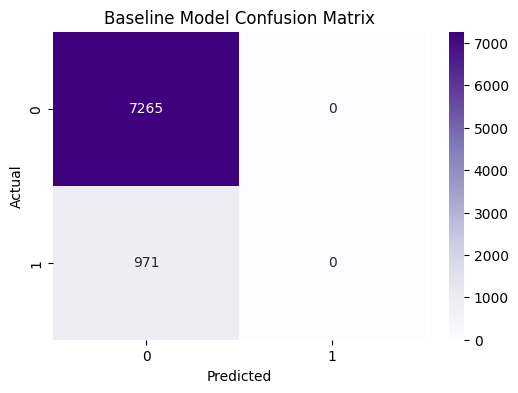

In [53]:
# Baseline - predict the majority class 'no'
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)
baseline_accuracy = baseline.score(X_test, y_test)

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

# Using confusion matrix to visualize
y_pred_baseline = baseline.predict(X_test)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, fmt='d', cmap='Purples')
plt.title('Baseline Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

After looking at the confusion matrix, the baseline identifies all the 'no' but not the really the 'yes'. So predicting only the 'no' for customers, we can only be correct about 88.21% of the time. This is due to the imbalance of the dataset where clients don't subscribe to the term. There is some inaccuracy using this type of metric for such an imbalanced dataset. Focus on the 'yes' needs to be included in future analysis to make it more accurate. The upcoming models like LR, SVM, and Decision Tree can be used.

Also, looking at the EDA, this 88% aligns with the 'no' rate from the EDA.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

Using higher number of interations because of large dataset and features to make sure it works.

In [49]:
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

print("Trained Logistic Regression Model")

Trained Logistic Regression Model


### Problem 9: Score the Model

What is the accuracy of your model?

In [50]:
# Scoring Logistic Regression model
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

print(f"Testing Accuracy on Logistic Regression Model: {log_reg_accuracy:.4f}")

Testing Accuracy on Logistic Regression Model: 0.8821


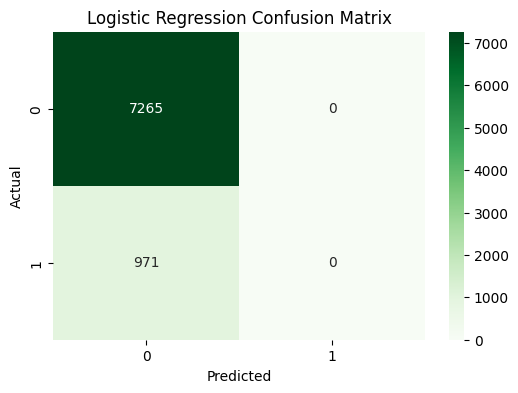

In [47]:
# Using the confusion matrix to visualize accuracy
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Comparing 88.21% accuracy to baseline 88.21%. It's very likely the model is predicting on the the non-subscribers than the actual subscribers who would. The accuracy and baseline being exact bascially suggests that it's not effective as-is to find potential customers.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [59]:
#Identifyig models used for comparison

models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    results.append({
        'Model': name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Create DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                 Model  Train Time  Train Accuracy  Test Accuracy
0                  KNN    0.017594        0.891014       0.872632
1  Logistic Regression    0.522862        0.888646       0.882103
2        Decision Tree    0.177690        0.917031       0.864376
3                  SVM  102.675227        0.889344       0.881860


Summary of report
- All models are ranging between 86% to 88% which is very close to the 88.21% baseline. This suggessts that accuracy might not be the best metric here to use becuse of that high imbalance of 'no' vs 'yes'.
- the models overall are performing well at classyfying, but not being effective on identfying the 'yes' term subscriptions
- The training time is very high for SVM at 102 seconds compared to the the other models, but for KNN it's the fastest but not by much compared to the Decision treen.
- As for overfitting which can be see comparing the training vs. the test. Since all the models EXCEPT for Decision Tree, are close which suggests low overfitting. Since Decision tree si 91.7% Train / 86.4% Test, it could be overfitting.
- Overall, generalization of the data across the models is pretty good, the minority class 'yes' is still inaccurately being displayed. This is where looking at precision over accuracy is good and F1 scoring might help.

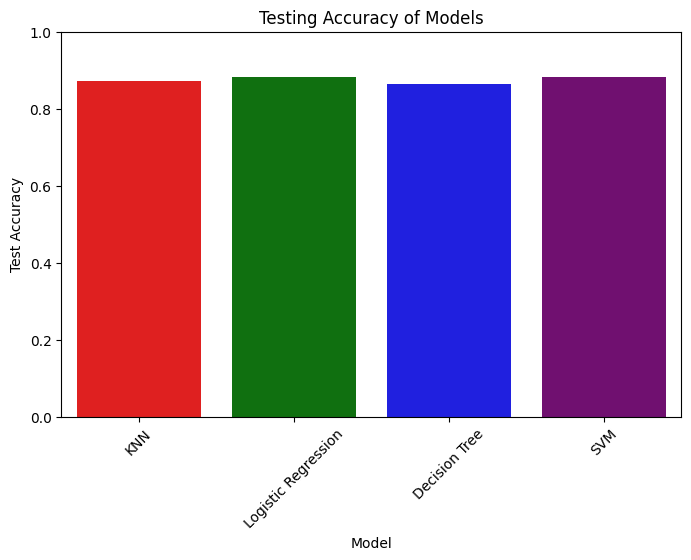

In [60]:
# Visualize test accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Test Accuracy', data=results_df, hue='Model', palette=['red', 'green', 'blue', 'purple'], legend=False)
plt.xticks(rotation=45)
plt.title('Testing Accuracy of Models')
plt.ylim(0, 1)
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

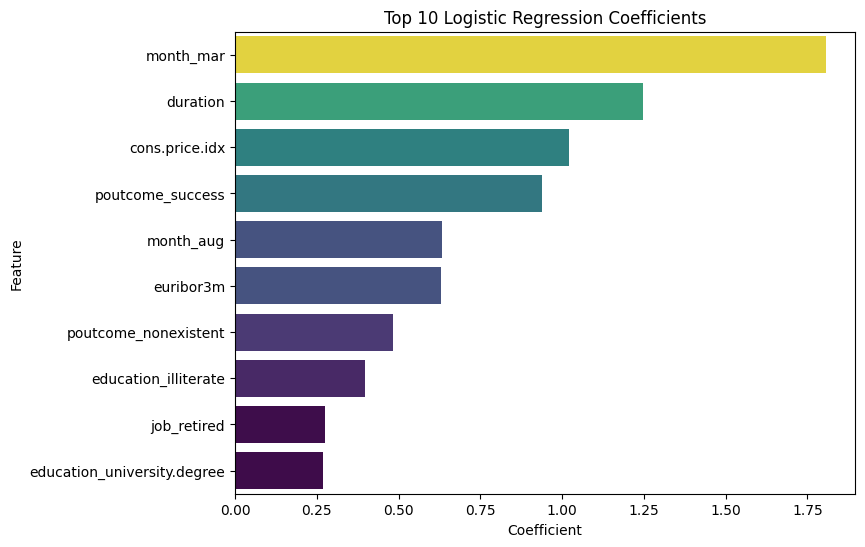

In [76]:
# I'm going to add all features to see if it can improve models
all_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df_all = df[all_features + ['y']]
df_all_encoded = pd.get_dummies(df_all, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)
df_all_encoded['y'] = df_all_encoded['y'].map({'yes': 1, 'no': 0})

# Scaling the numerical features
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X_all = df_all_encoded.drop('y', axis=1)
y_all = df_all_encoded['y']
X_all[numerical_cols] = scaler.fit_transform(X_all[numerical_cols])

# Split the new data
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Logistic Regression coefficients visual
coef_df = pd.DataFrame({'Feature': X_train_all.columns, 'Coefficient': log_reg.fit(X_train_all, y_train_all).coef_[0]}).sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), hue='Coefficient', palette='viridis', legend=False)
plt.title('Top 10 Logistic Regression Coefficients')
plt.show()

Finding report so far:
- 'Duration' and 'campaign' are key predictors as seen in the graph based LR coefficents. I will need to exclue 'duration' for it to work in a realistic model. Basically, the longer the call as I mentioned earlier, the higher the duration and most likely the customer will get the term subscription.
- For campaign, it's a negative reaction becuase the more time you contact the customer the less likely they are to go with term subscription - annoyed.

##Hyperparameter Tuning

Going to use Gridsearch  5 fold cross-validation and F1 scoring for this.


> Add blockquote



In [78]:
# Parameter grids

param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, None]},
    'SVM': {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}
}

# Perform grid searching with F1 score
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1')
    grid_search.fit(X_train_all, y_train_all)
    best_models[name] = grid_search.best_estimator_
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Best Cross-Validation F1-Score: {grid_search.best_score_:.4f}")

KNN Best Parameters: {'n_neighbors': 7}
KNN Best Cross-Validation F1-Score: 0.4976
Logistic Regression Best Parameters: {'C': 10}
Logistic Regression Best Cross-Validation F1-Score: 0.5209
Decision Tree Best Parameters: {'max_depth': 3}
Decision Tree Best Cross-Validation F1-Score: 0.5912
SVM Best Parameters: {'C': 1, 'kernel': 'rbf'}
SVM Best Cross-Validation F1-Score: 0.5071


##Summary of report
KNN Model Report
KNN Best Parameters: {'n_neighbors': 7}
KNN Best Cross-Validation F1-Score: 0.4976
Note: 7 is the best choice among 3, 5, 7 giving the highest score F1 score. The score of 49.7% suggests a good balance between precision and recall for identifying the 'yes' subscriptions in the training data

Logistic Regression Model Report
Logistic Regression Best Parameters: {'C': 10}
Logistic Regression Best Cross-Validation F1-Score: 0.5209
Note: Just a little higher than the KNN at 52.0%, so not too bad on balance of precision and recall as well.

Decision Tree Model Report
Decision Tree Best Parameters: {'max_depth': 3}
Decision Tree Best Cross-Validation F1-Score: 0.5912
Note: Out of the three values 3, 5, none , the depth of 3 is the best. So, limiting the depth of the tree helps improve the f1 score and potentially reduce overfitting. The score of 59.1% also suggests that a tree with less depth would be good at identifying the 'yes' in the dataset.

SVM Model Report
SVM Best Parameters: {'C': 1, 'kernel': 'rbf'}
SVM Best Cross-Validation F1-Score: 0.5071
Note: This model always takes the longest to perform overall. It's training time is much higher than the rest of the models. Overall, focusing on identifying the 'yes' term is moderate compared to KNN and LR. However, not as effective as the Decision tree. Computational costs need to be considered here if the consumption is worth the calc since the other models can perform similarly if not better.





##Performanc Metrics

This next section will attempt to determine the best evaluation metric for ALL models.


KNN Performance:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7265
           1       0.61      0.42      0.50       971

    accuracy                           0.90      8236
   macro avg       0.77      0.69      0.72      8236
weighted avg       0.89      0.90      0.89      8236



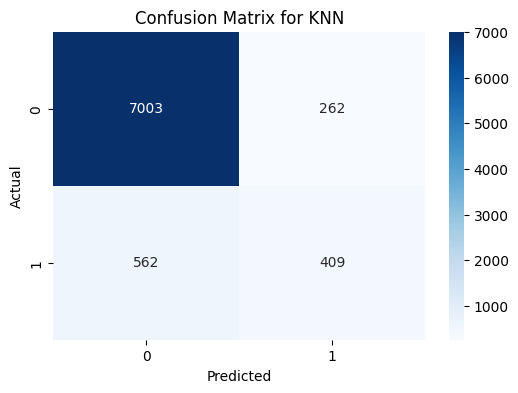

In [86]:
# Evaluating the Tuned KNN Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

name = 'KNN'
model = best_models[name]
y_pred = model.predict(X_test_all)

print(f"\n{name} Performance:")
print(classification_report(y_test_all, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_all, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Summary of Results

K Nearest Neighbor

The KNN model performs very well to identify customers who will NOT subscribe (focusing on higher precision and recall for the class 0 'no'). However, it struggles to identify the class 1 'yes'. It precision to predict 'yes' at 61% , but misses alot of actual 'yes' at 42%.  The F1 score of 50% for minority 'yes' is a limitation. For prediction on the business objective, this is a low recall (false negatives) and a concern as potential leads could be missed entirely.


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7265
           1       0.66      0.41      0.51       971

    accuracy                           0.91      8236
   macro avg       0.79      0.69      0.73      8236
weighted avg       0.89      0.91      0.90      8236



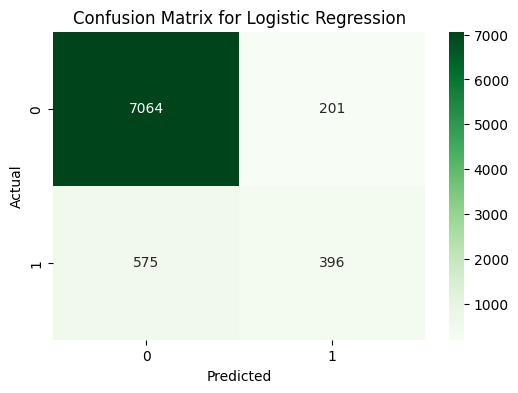

In [87]:
# Evaluating the Tuned Logistic Regression Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

name = 'Logistic Regression'
model = best_models[name]
y_pred = model.predict(X_test_all)

print(f"\n{name} Performance:")
print(classification_report(y_test_all, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_all, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title(f'Confusion Matrix for {name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression Report

The model performs well and similar to the KNN model above. It's great at identifying customers who will NOT term subscribe which is high precision and recall. However, it still struggles like the KNN at identifying customers who will subscribe having a lower recall for 'yes'. The precision for predicting 'yes' is a little better than KNN (66% vs. 61%) , the recall is lower (41% vs. 42$) giving a very similar F1 scoring (51% vs 50%) for the minority class 'yes'. Overall, despite the tuning done, it's missing potential subscribers.





Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7265
           1       0.59      0.59      0.59       971

    accuracy                           0.90      8236
   macro avg       0.77      0.77      0.77      8236
weighted avg       0.90      0.90      0.90      8236



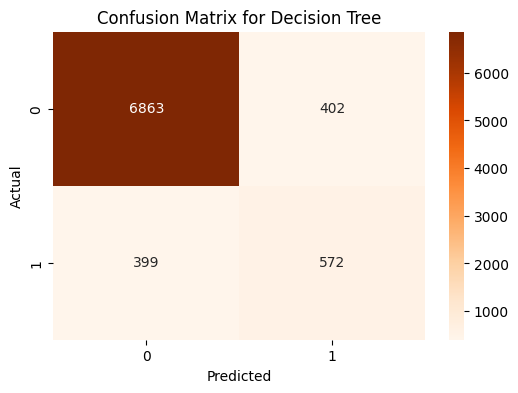

In [88]:
# Evaluate the Tuned Decision Tree Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

name = 'Decision Tree'
model = best_models[name]
y_pred = model.predict(X_test_all)

print(f"\n{name} Performance:")
print(classification_report(y_test_all, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_all, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title(f'Confusion Matrix for {name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Report

The Decision Tree model with a depth of 3 found using GridSearchCV, showed a good reliability to identify the 'yes' customers compared to both KNN and Logistic regression. Since the precision for 'yes' is slighltly lower, the higher recall (59% vs 42%) gives a better F1 score (59% vs 50%). This means the Decision Tree is awesome and better at finding subscribing customers !!!. Overall, the Decision Tree is better performing among the models to meet the business objective at predicting term subscribers.





SVM Performance:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7265
           1       0.69      0.42      0.52       971

    accuracy                           0.91      8236
   macro avg       0.81      0.69      0.73      8236
weighted avg       0.90      0.91      0.90      8236



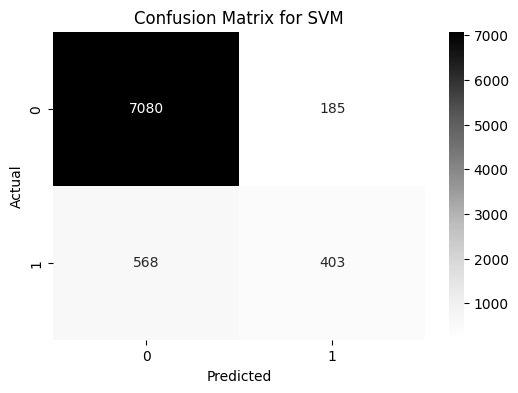

In [89]:
# Evaluate the Tuned SVM Model (HIGHLY COMPUTATIONAL)
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

name = 'SVM'
model = best_models[name]
y_pred = model.predict(X_test_all)

print(f"\n{name} Performance:")
print(classification_report(y_test_all, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_all, y_pred), annot=True, fmt='d', cmap='Greys')
plt.title(f'Confusion Matrix for {name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM Model Report

The SVM model shows the highest precision for predicting the minority class 'yes' among all the models to predict subscription and is more likely to be accurate at 69%. The recall for identifying actual term subscribers is low at 42% similar to KNN and Logistic and lower than Decision Tree. The F1 score 52% supports this which is similar to KNN and Logistic as mentioned before and lower than Decision Tree.

If we think about the busines objective again to identify potential (predict) term subscribers of 'yes' , it is more reliable (higher precision), it will miss the actual customers because of lower recall. Let's not forget how long it took for the computation. SVM comes with computational heavy costs compared to other models seen earlier in the report comparisons. Overall, compared to all the models the Decision Tree is lower in computation and gets a better balance between precision and recall for the 'yes' class and higher F1-score with a much lower training time.





## Project Summary and Recommendations for the Business
Posted in README file

**Business Objective:**

The main goal of this project is to predict whether a potential bank client is likely to subscribe to a long-term deposit based on their characteristics and past interactions, and to use this prediction to improve the effectiveness of marketing campaigns. Essentially, we want to find the clients who are most likely to say "yes" to the offer before we even contact them, so we can focus our efforts on those most promising leads.

**Findings from analysis**

We looked at your historical data from previous marketing campaigns. We saw that most people contacted did **not** subscribe to the deposit. This is important because it means a simple prediction that no one will subscribe would be right most of the time (around 88% accurate). This "baseline" accuracy is a starting point, but it doesn't help us find the valuable clients who *will* subscribe.

We then tested a few different prediction models (like KNN, Logistic Regression, Decision Tree, and SVM) to see which one was best at identifying those who are likely to subscribe. We realized that just looking at overall accuracy wasn't enough because of the large number of people who didn't subscribe. We needed to look at how well the models found the people who *did* subscribe.

**Why the Decision Tree Model is Recommended:**

Based on our analysis, the **Decision Tree model** stands out as the most promising for your business objective. Here's why, in simple terms:

*   **Better at Finding Potential Subscribers:** While all models were good at identifying people who *wouldn't* subscribe, the Decision Tree was significantly better than the others at finding the people who *would* subscribe. Think of it like a better filter for finding the interested customers.
*   **Good Balance:** It does a good job of balancing between finding actual subscribers and not incorrectly flagging too many non-subscribers as interested. This means you're more likely to reach out to genuinely interested people and less likely to waste time on those who aren't.
*   **Easy to Understand:** Decision Tree models are relatively easy to understand. You can visually see the rules it uses to make predictions (like a flowchart), which can provide valuable insights into the characteristics of clients who are likely to subscribe.
*   **Faster to Use:** Compared to some other complex models we tested (like the SVM), the Decision Tree was much faster to train and use, making it more practical for real-world marketing campaigns and less computationally expensive.

**Important Considerations:**

*   We excluded the 'duration' of the last call from the model used for prediction. While call duration is a strong indicator (longer calls often mean more interest), you don't know how long a call will last *before* you make it. Including it would make the predictions unrealistic for targeting.
*   The 'campaign' feature (number of times contacted) showed that more contacts in a campaign made a subscription less likely, which makes sense – people might get annoyed by too many calls.

**Next Steps and Recommendations:**

1.  **Implement the Decision Tree Model:** Integrate the tuned Decision Tree model into your marketing process.
2.  **Target Promising Leads:** Use the model to identify clients who are predicted to subscribe and prioritize contacting them.
3.  **Monitor Performance:** Continuously track how well the model's predictions translate into actual subscriptions in your campaigns. Monitor metrics like the conversion rate of clients identified as likely subscribers by the model.
4.  **Gather More Data:** Collect data on the outcomes of campaigns where you use this targeted approach. This new data can be used to further refine and improve the model in the future.
5.  **Explore Additional Features:** Consider if there are other relevant pieces of information you collect about clients that could be included in the model to potentially improve its predictions.
6.  **Consider Different Campaign Strategies:** Based on the insights from the Decision Tree (e.g., which clients are associated with subscription), you might tailor your marketing messages or approach for different client segments.

By using this Decision Tree model, you can move beyond a one-size-fits-all approach and make your marketing campaigns more efficient and effective by focusing on the clients who are genuinely most likely to be interested in your long-term deposit offer.